## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


### Goals

- Develop a model to find the variables, which are significant the demand for shared bikes with the available independent     variables.
- It will be used by the management to understandan manipulate the business strategy to meet the demand levels and meet the   customers expectations

## Import Libraries

In [1]:
# Importing libraries packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset and Routine Check

In [2]:
# Read the day.csv data
boombikes = pd.read_csv("day.csv")

In [3]:
boombikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# Check the Shape
boombikes.shape

(730, 16)

In [5]:
# Check the Datatypes
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check the summary of dataset
boombikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
# Check the columns 
boombikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Data Cleaning

In [8]:
boombikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [9]:
# Drop the unnecessary columns
boombikes.drop(["instant", "casual", "registered"], axis = 1, inplace = True)

In [10]:
boombikes.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018       1   0     1        0        1           1           2   
1  02-01-2018       1   0     1        0        2           1           2   
2  03-01-2018       1   0     1        0        3           1           1   
3  04-01-2018       1   0     1        0        4           1           1   
4  05-01-2018       1   0     1        0        5           1           1   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600

In [11]:
# Clean the date dteday column and drop dteday column
boombikes["days"] = (pd.to_datetime(boombikes["dteday"],format= "%d-%m-%Y") - pd.to_datetime("01-01-2018",format= "%d-%m-%Y")).dt.days
boombikes.drop(["dteday"], axis = 1, inplace = True)

- instant is just a row instance identifier.
- dteday is removed as we have some of date features like mnth and year and weekday already in other columns and also for     this analysis we will not consider day to day trend in demand for bikes.
- casual and registered variables are not available at the time of prediction and also these describe the target variable     cnt in a very trivial way target = casual + registered, which leads to data leakage.

In [12]:
boombikes.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  days  
0  18.18125  80.5833  10.749882   985     0  
1  17.68695  69.6087  16.652113   801     1  
2   9.47025  43.7273  16.636703  1349     2  
3  10.60610  59.0435  10.739832  1562     3  
4  11.46350  43.6957  12.522300  1600     4

## Handling Missing Values

In [13]:
boombikes.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days          0
dtype: int64

There is no Missing Values.

## Outliers Check

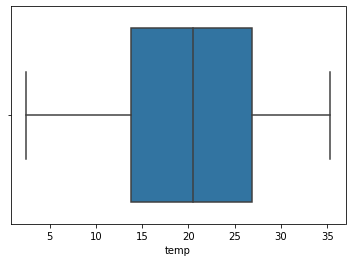

In [14]:
# Outliers Check
sns.boxplot(boombikes["temp"])
plt.show()

In [15]:
sns.boxplot(boombikes["atemp"])
plt.show()

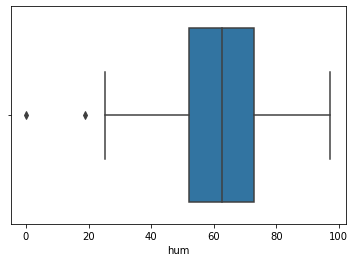

In [16]:
sns.boxplot(boombikes["hum"])
plt.show()

In [17]:
sns.boxplot(boombikes["windspeed"])
plt.show()

In [18]:
sns.boxplot(boombikes["cnt"])
plt.show()

From the above figure's, we can conclude that their is no outliers to be handled.

## EDA

In [19]:
# Convert the season, weathersit, mnth and weekday into categorial
boombikes.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace= True)
boombikes.weathersit.replace({1:"clear", 2:"mist", 3:"light snow", 4:"heavy rain"},inplace= True)
boombikes.mnth.replace({1:"jan", 2:"feb", 3:"mar", 4:"apr", 5:"may", 6:"jun", 7:"jul", 8:"aug", 9:"sep", 10:"oct", 11:"nov", 12:"dec"},inplace= True)
boombikes.weekday.replace({1:"mon", 2:"tue", 3:"wed", 4:"thru", 5:"fri", 6:"sat", 7:"sun"},inplace= True)

In [20]:
boombikes.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     mon           1       mist  14.110847   
1  spring   0  jan        0     tue           1       mist  14.902598   
2  spring   0  jan        0     wed           1      clear   8.050924   
3  spring   0  jan        0    thru           1      clear   8.200000   
4  spring   0  jan        0     fri           1      clear   9.305237   

      atemp      hum  windspeed   cnt  days  
0  18.18125  80.5833  10.749882   985     0  
1  17.68695  69.6087  16.652113   801     1  
2   9.47025  43.7273  16.636703  1349     2  
3  10.60610  59.0435  10.739832  1562     3  
4  11.46350  43.6957  12.522300  1600     4

In [21]:
# Check the relations
sns.pairplot(boombikes)
plt.show()

In [22]:
# Corelation Check
boombikes.corr()

yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.008195   -0.011852  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.257009 -0.028764 -0.032703 -0.015662   
workingday -0.011852 -0.257009    1.000000  0.002044  0.010657  0.053770   
temp        0.048789 -0.028764    0.002044  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.010657  0.991696  1.000000  0.141512   
hum        -0.112547 -0.015662    0.053770  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.002453 -0.158186 -0.183876 -0.248506   
cnt         0.569728 -0.068764   -0.027640  0.627044  0.630685 -0.098543   
days        0.866026  0.016275   -0.015171  0.150738  0.152773  0.016080   

            windspeed       cnt      days  
yr          -0.011624  0.569728  0.866026  
holiday      0.006257 -0.068764  0.016275  
workingday  -0.002453 -0.027640 -0.015171  
temp        -0.158186  0.627044  0.150738  
atemp       -0.183876  0.630685  0.152773  
hum         -0.248506 -0.098543  0.016080  
windspeed    1.000000 -0.235132 -0.112667  
cnt         -0.235132  1.000000  0.629896  
days        -0.112667  0.629896  1.000000

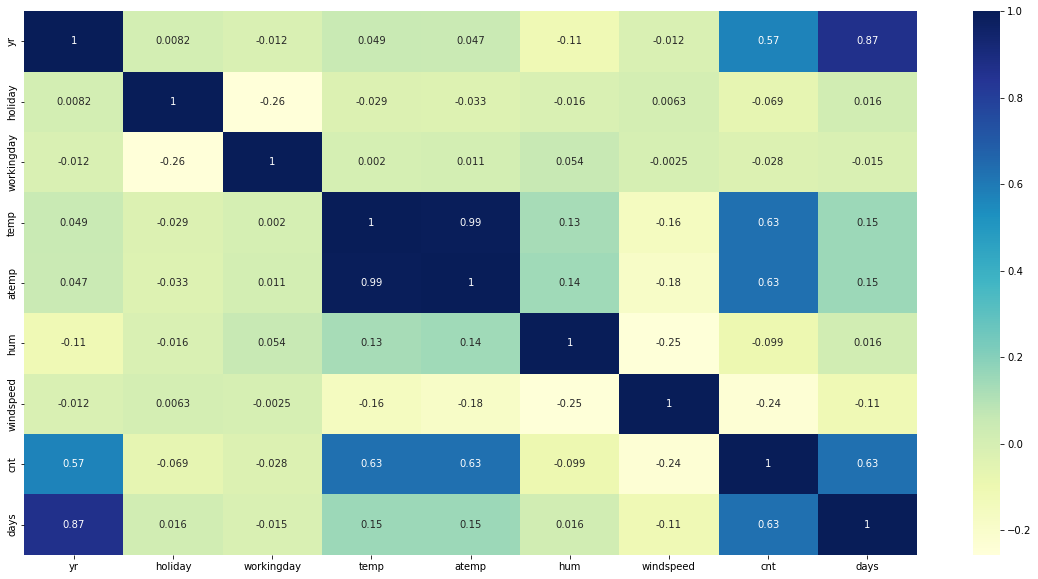

In [23]:
# Co-relation Check
plt.figure(figsize = (20,10))
sns.heatmap(boombikes.corr(), cmap = "YlGnBu", annot = True)
plt.show()

From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.

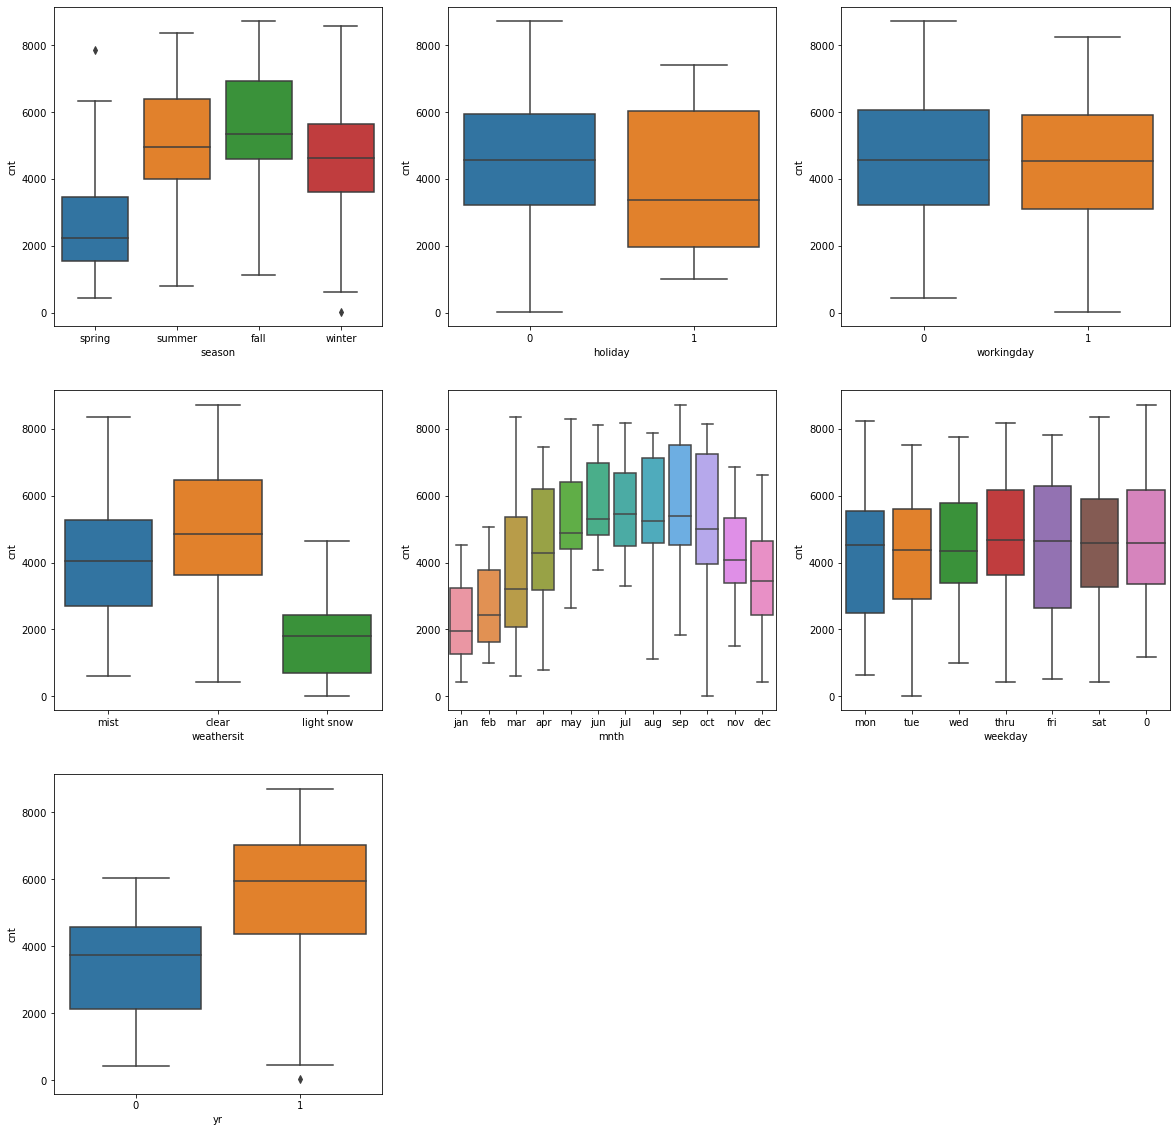

In [24]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data = boombikes)
plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt', data=boombikes)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt', data=boombikes)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt', data=boombikes)
plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt', data=boombikes)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt', data=boombikes)
plt.subplot(3,3,7)
sns.boxplot(x='yr',y='cnt', data=boombikes)
plt.show()

1. Season 3 i.e. fall has highest demand for rental bikes.
2. I see that demand for next year has grown.
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing.
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand.
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extreme weather      conditions.

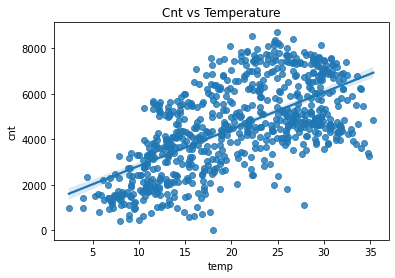

In [25]:
sns.regplot(data = boombikes, x = "temp", y = "cnt")
plt.title("Cnt vs Temperature")
plt.show()

Demand of bikes are positively correlated to temp.

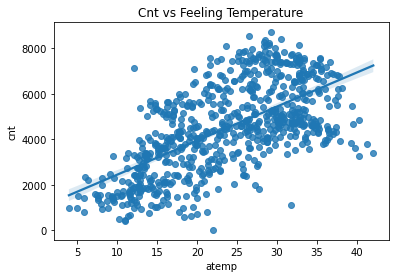

In [26]:
sns.regplot(data = boombikes, x = "atemp", y = "cnt")
plt.title("Cnt vs Feeling Temperature")
plt.show()

Demand of bikes are positively correlated to atemp

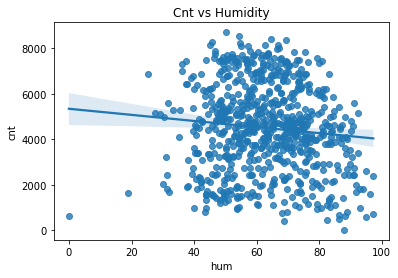

In [27]:
sns.regplot(data = boombikes, x = "hum", y = "cnt")
plt.title("Cnt vs Humidity")
plt.show()

We can conclude that as the humidity increases the demand for bikes decreases.

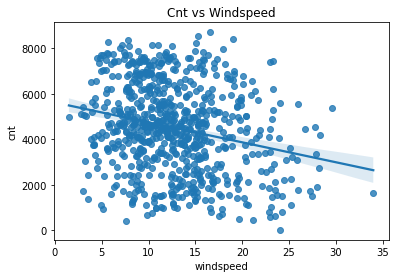

In [28]:
sns.regplot(data = boombikes, x = "windspeed", y = "cnt")
plt.title("Cnt vs Windspeed")
plt.show()

We can conclude that as the Windspeed increases the demand for bikes decreases.

## Data Preparation

### Create Dummy variables for all the Categorical variables for Linear Regression.

In [29]:
boombikes = pd.get_dummies(data = boombikes, columns = ["season","mnth","weekday","weathersit"],drop_first = True)

In [30]:
boombikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_thru',
       'weekday_tue', 'weekday_wed', 'weathersit_light snow',
       'weathersit_mist'],
      dtype='object')

In [31]:
boombikes.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   days  season_spring  ...  mnth_oct  mnth_sep  weekday_fri  weekday_mon  \
0     0              1  ...         0         0            0            1   
1     1              1  ...         0         0            0            0   
2     2              1  ...         0         0            0            0   
3     3              1  ...         0         0            0            0   
4     4              1  ...         0         0            1            0   

   weekday_sat  weekday_thru  weekday_tue  weekday_wed  weathersit_light snow  \
0            0             0            0            0                      0   
1            0             0            1            0                      0   
2            0             0            0            1                      0   
3            0             1            0            0                      0   
4            0             0            0            0                      0   

   weathersit_mist  
0                1  
1                1  
2                0  
3                0  
4                0  

[5 rows x 31 columns]

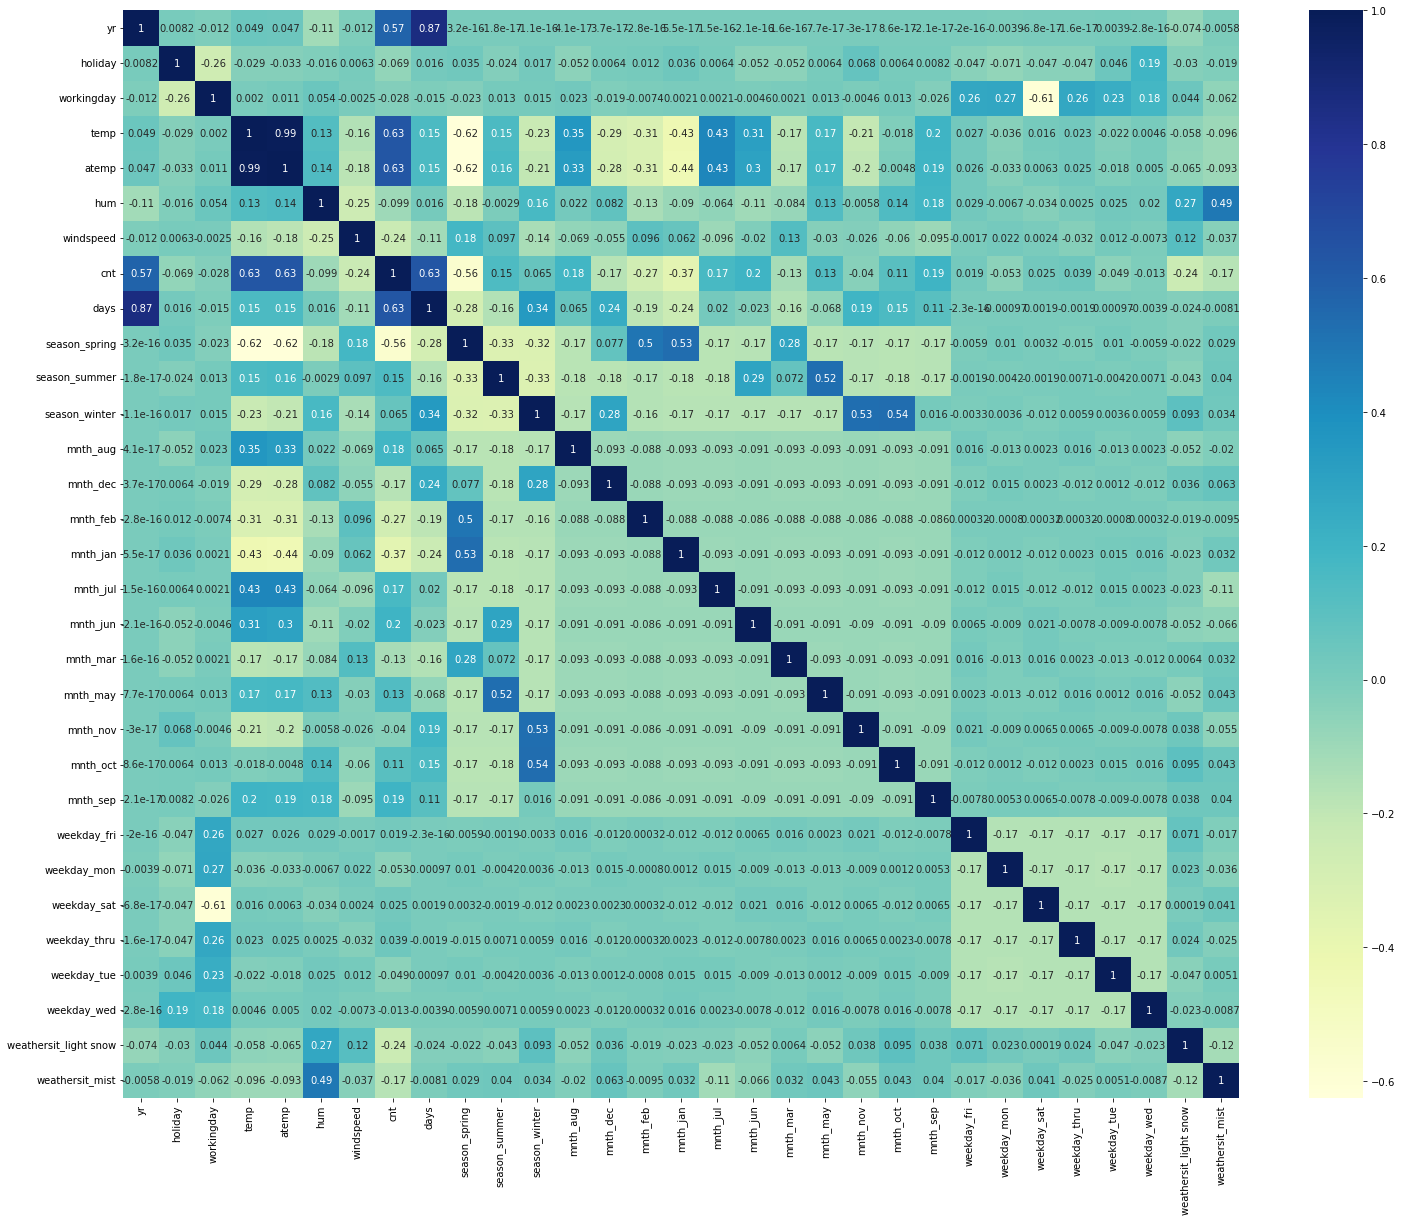

In [32]:
plt.figure(figsize = (25,20))
sns.heatmap(boombikes.corr(), annot = True, cmap = "YlGnBu")
plt.show()

## Model Building

In [33]:
# import scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
# y is the target variable
y = boombikes.pop("cnt")
# X is all the variables which are independent 
X = boombikes
# Train Test Split with 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
X.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  days  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882     0   
1   0        0           1  14.902598  17.68695  69.6087  16.652113     1   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     2   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     3   
4   0        0           1   9.305237  11.46350  43.6957  12.522300     4   

   season_spring  season_summer  ...  mnth_oct  mnth_sep  weekday_fri  \
0              1              0  ...         0         0            0   
1              1              0  ...         0         0            0   
2              1              0  ...         0         0            0   
3              1              0  ...         0         0            0   
4              1              0  ...         0         0            1   

   weekday_mon  weekday_sat  weekday_thru  weekday_tue  weekday_wed  \
0            1            0             0            0            0   
1            0            0             0            1            0   
2            0            0             0            0            1   
3            0            0             1            0            0   
4            0            0             0            0            0   

   weathersit_light snow  weathersit_mist  
0                      0                1  
1                      0                1  
2                      0                0  
3                      0                0  
4                      0                0  

[5 rows x 30 columns]

In [36]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [37]:
print(X_train.shape)
print(X_test.shape)

(510, 30)
(219, 30)


### Feature Scaling continuous variables

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [39]:
# Let us scale continuous variable
vars_1 = ["temp","atemp","hum","windspeed","days"]
# Use Normalized scaler to scale 
scaler = MinMaxScaler()
# Fit and transform training set only
X_train[vars_1] = scaler.fit_transform(X_train[vars_1])

In [40]:
X_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.453386    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed        days  season_spring  season_summer  ...    mnth_oct  \
count  510.000000  510.000000     510.000000     510.000000  ...  510.000000   
mean     0.320768    0.505414       0.243137       0.245098  ...    0.086275   
std      0.169797    0.288281       0.429398       0.430568  ...    0.281045   
min      0.000000    0.000000       0.000000       0.000000  ...    0.000000   
25%      0.199179    0.255838       0.000000       0.000000  ...    0.000000   
50%      0.296763    0.510989       0.000000       0.000000  ...    0.000000   
75%      0.414447    0.759272       0.000000       0.000000  ...    0.000000   
max      1.000000    1.000000       1.000000       1.000000  ...    1.000000   

         mnth_sep  weekday_fri  weekday_mon  weekday_sat  weekday_thru  \
count  510.000000   510.000000   510.000000   510.000000    510.000000   
mean     0.080392     0.147059     0.154902     0.129412      0.143137   
std      0.272166     0.354512     0.362166     0.335985      0.350557   
min      0.000000     0.000000     0.000000     0.000000      0.000000   
25%      0.000000     0.000000     0.000000     0.000000      0.000000   
50%      0.000000     0.000000     0.000000     0.000000      0.000000   
75%      0.000000     0.000000     0.000000     0.000000      0.000000   
max      1.000000     1.000000     1.000000     1.000000      1.000000   

       weekday_tue  weekday_wed  weathersit_light snow  weathersit_mist  
count   510.000000   510.000000             510.000000       510.000000  
mean      0.152941     0.135294               0.029412         0.343137  
std       0.360284     0.342373               0.169124         0.475223  
min       0.000000     0.000000               0.000000         0.000000  
25%       0.000000     0.000000               0.000000         0.000000  
50%       0.000000     0.000000               0.000000         0.000000  
75%       0.000000     0.000000               0.000000         1.000000  
max       1.000000     1.000000               1.000000         1.000000  

[8 rows x 30 columns]

In [41]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

         days  season_spring  season_summer  ...  mnth_oct  mnth_sep  \
653  0.896978              0              0  ...         1         0   
576  0.791209              0              0  ...         0         0   
426  0.585165              1              0  ...         0         0   
728  1.000000              1              0  ...         0         0   
482  0.662088              0              1  ...         0         0   

     weekday_fri  weekday_mon  weekday_sat  weekday_thru  weekday_tue  \
653            0            0            0             0            0   
576            0            0            0             0            0   
426            0            0            0             0            0   
728            0            1            0             0            0   
482            0            0            0             0            0   

     weekday_wed  weathersit_light snow  weathersit_mist  
653            1                      0                0  
576            1                      0                0  
426            0                      0                1  
728            0                      0                0  
482            0                      0                1  

[5 rows x 30 columns]

### Build a Model using RFE and Automated approach.

In [42]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
# Cut down number of features to 15 using automated approach
rfe = RFE(lr, 15)
rfe.fit (X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days', False, 12),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 10),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weekday_fri', False, 6),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 15),
 ('weekday_thru', False, 5),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 7),
 ('weathersit_light snow', True, 1),
 ('weathersit_mist', True, 1)]

In [45]:
# The selected 15 variables in cols list
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sep', 'weathersit_light snow', 'weathersit_mist'],
      dtype='object')

In [46]:
# Check which columns are been eliminated
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'days', 'mnth_aug', 'mnth_feb', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_fri', 'weekday_mon',
       'weekday_sat', 'weekday_thru', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [47]:
# Create X_train with RFE selected variables
X_train_rfe1 = X_train[cols]

### Model 1

In [48]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe1)

# Create a 1st fitted model
lm1 = sm.OLS(y_train, X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          3.34e-189
Time:                        00:37:21   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2805.55

In [49]:
lm1.params

const                    2805.556199
yr                       2002.011871
holiday                  -792.957628
temp                     4171.955822
hum                     -1392.692790
windspeed               -1638.069644
season_spring            -536.614549
season_summer             354.345769
season_winter             899.054692
mnth_dec                 -323.338009
mnth_jan                 -380.257300
mnth_jul                 -482.365394
mnth_nov                 -355.925870
mnth_sep                  650.955478
weathersit_light snow   -2156.625822
weathersit_mist          -485.676909
dtype: float64

### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                     hum  30.94
2                    temp  17.80
4               windspeed   4.72
5           season_spring   4.37
7           season_winter   4.06
6           season_summer   2.81
14        weathersit_mist   2.32
0                      yr   2.09
11               mnth_nov   1.83
9                mnth_jan   1.75
10               mnth_jul   1.59
8                mnth_dec   1.55
12               mnth_sep   1.41
13  weathersit_light snow   1.28
1                 holiday   1.06

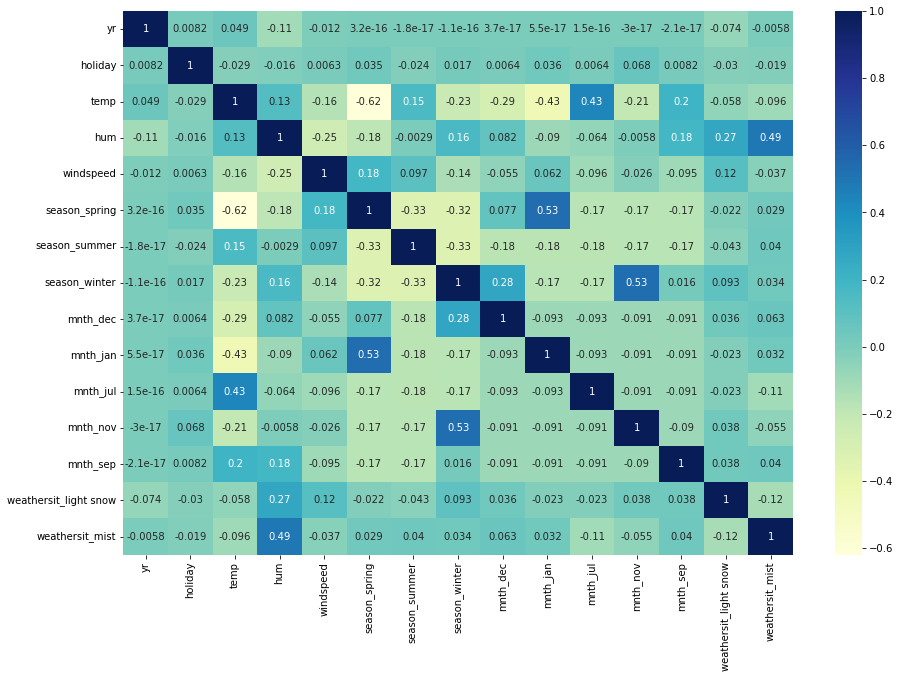

In [51]:
# Check the correlations
plt.figure(figsize = (15,10))
sns.heatmap(boombikes[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sep', 'weathersit_light snow', 'weathersit_mist']].corr(), cmap = "YlGnBu", annot = True)
plt.show()

### Model 2

In [52]:
# Dropping the variable mnth_jan as it has -ve co-efficient
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jul',
       'mnth_nov', 'mnth_sep', 'weathersit_light snow', 'weathersit_mist']
X_train_rfe2 = X_train[cols]

In [53]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a 1st fitted model
lm2 = sm.OLS(y_train, X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.24e-189
Time:                        00:37:23   Log-Likelihood:                -4114.1
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     495   BIC:                             8322.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2634.87

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                     hum  29.35
2                    temp  16.75
4               windspeed   4.72
7           season_winter   4.06
5           season_spring   4.04
6           season_summer   2.80
13        weathersit_mist   2.31
0                      yr   2.08
10               mnth_nov   1.82
9                mnth_jul   1.59
8                mnth_dec   1.48
11               mnth_sep   1.41
12  weathersit_light snow   1.26
1                 holiday   1.06

### Model 3

In [55]:
# p-value is high for all the columns, Drop the hum column
cols = cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jul',
       'mnth_nov', 'mnth_sep', 'weathersit_light snow', 'weathersit_mist']
X_train_rfe3 = X_train[cols]

In [56]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Create a 1st fitted model
lm3 = sm.OLS(y_train, X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.46e-186
Time:                        00:37:23   Log-Likelihood:                -4124.0
No. Observations:                 510   AIC:                             8276.
Df Residuals:                     496   BIC:                             8335.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1932.39

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                    temp  5.12
3               windspeed  4.65
6           season_winter  2.90
5           season_summer  2.22
4           season_spring  2.13
0                      yr  2.07
9                mnth_nov  1.79
8                mnth_jul  1.59
12        weathersit_mist  1.55
7                mnth_dec  1.42
10               mnth_sep  1.35
11  weathersit_light snow  1.09
1                 holiday  1.06

### Model 4

In [58]:
# Dropping the variable holiday as it has -ve co-efficient
cols = ['yr', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jul',
       'mnth_nov', 'mnth_sep', 'weathersit_light snow', 'weathersit_mist']
X_train_rfe4 = X_train[cols]

In [59]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create a 1st fitted model
lm4 = sm.OLS(y_train, X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.0
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.58e-184
Time:                        00:37:24   Log-Likelihood:                -4130.5
No. Observations:                 510   AIC:                             8287.
Df Residuals:                     497   BIC:                             8342.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1935.16

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                    temp  5.12
2               windspeed  4.65
5           season_winter  2.90
4           season_summer  2.22
3           season_spring  2.12
0                      yr  2.07
8                mnth_nov  1.77
7                mnth_jul  1.58
11        weathersit_mist  1.54
6                mnth_dec  1.42
9                mnth_sep  1.34
10  weathersit_light snow  1.09

### Model 5

In [61]:
# Dropping the variable mnth_jul as it has -ve co-efficient
cols = ['yr', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec',
       'mnth_nov', 'mnth_sep', 'weathersit_light snow', 'weathersit_mist']
X_train_rfe5 = X_train[cols]

In [62]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Create a 1st fitted model
lm5 = sm.OLS(y_train, X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.2
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.32e-184
Time:                        00:37:24   Log-Likelihood:                -4134.3
No. Observations:                 510   AIC:                             8293.
Df Residuals:                     498   BIC:                             8343.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1860.11

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2               windspeed  4.65
1                    temp  3.86
5           season_winter  2.72
0                      yr  2.07
3           season_spring  2.03
4           season_summer  1.89
7                mnth_nov  1.77
10        weathersit_mist  1.54
6                mnth_dec  1.42
8                mnth_sep  1.24
9   weathersit_light snow  1.08

### Model 6

In [64]:
# Dropping the variable windspeed as it has -ve co-efficient
cols = ['yr', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec',
       'mnth_nov', 'mnth_sep', 'weathersit_light snow', 'weathersit_mist']
X_train_rfe6 = X_train[cols]

In [65]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Create a 1st fitted model
lm6 = sm.OLS(y_train, X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.9
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.27e-178
Time:                        00:37:24   Log-Likelihood:                -4151.3
No. Observations:                 510   AIC:                             8325.
Df Residuals:                     499   BIC:                             8371.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1419.66

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                   temp  2.89
4          season_winter  2.60
0                     yr  2.06
6               mnth_nov  1.75
3          season_summer  1.62
9        weathersit_mist  1.54
5               mnth_dec  1.42
2          season_spring  1.36
7               mnth_sep  1.24
8  weathersit_light snow  1.07

### Model 7

In [67]:
# Dropping the variable mnth_dec as it has -ve co-efficient and high p-value
cols = ['yr', 'temp', 'season_spring',
       'season_summer', 'season_winter',
       'mnth_nov', 'mnth_sep', 'weathersit_light snow', 'weathersit_mist']
X_train_rfe7 = X_train[cols]

In [68]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe7)

# Create a 1st fitted model
lm7 = sm.OLS(y_train, X_train_lm7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.0
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          8.62e-179
Time:                        00:37:24   Log-Likelihood:                -4152.5
No. Observations:                 510   AIC:                             8325.
Df Residuals:                     500   BIC:                             8367.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1314.55

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                   temp  2.89
0                     yr  2.06
4          season_winter  1.99
3          season_summer  1.62
5               mnth_nov  1.55
8        weathersit_mist  1.54
2          season_spring  1.31
6               mnth_sep  1.23
7  weathersit_light snow  1.07

### Model 8

In [70]:
# Drop the variable mnth_nov have high p-value
cols = ['yr', 'temp', 'season_spring',
       'season_summer', 'season_winter',
       'mnth_sep', 'weathersit_mist','weathersit_light snow']
X_train_rfe8 = X_train[cols]

In [71]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_rfe8)

# Create a 1st fitted model
lm8 = sm.OLS(y_train, X_train_lm8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          3.09e-179
Time:                        00:37:25   Log-Likelihood:                -4154.4
No. Observations:                 510   AIC:                             8327.
Df Residuals:                     501   BIC:                             8365.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1230.29

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                   temp  2.89
0                     yr  2.06
3          season_summer  1.62
6        weathersit_mist  1.54
4          season_winter  1.42
2          season_spring  1.31
5               mnth_sep  1.22
7  weathersit_light snow  1.06

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.817 Let us select Model 8 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [73]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [74]:
cols = ['yr', 'temp', 'season_spring',
       'season_summer', 'season_winter',
       'mnth_sep', 'weathersit_mist','weathersit_light snow']
lr = build_model_sk(X_train[cols], y_train)
print(lr.intercept_,lr.coef_)

1230.291827047708 [ 2029.2708141   4271.95819593  -584.6108636    444.94978851
   819.43164639   795.48525606  -666.49079681 -2578.77684871]


## Model Evaluation

### Residual Analysis

In [75]:
y_train_pred = lr.predict(X_train[cols])

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)
plt.show()

Errors are normally ditributed with mean 0. So everything seems to be fine.

In [77]:
r2_score(y_train, y_train_pred)

0.8168654184330812

### Making Predictions Using the Final Model

In [78]:
# Scale variables in X_test
num_vars = ["temp","atemp","hum","windspeed","days"]

# Test data to be transformed only , no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [79]:
# Columns from our final model
cols = ['yr', 'temp', 'season_spring',
       'season_summer', 'season_winter',
       'mnth_sep', 'weathersit_mist','weathersit_light snow']

# Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [80]:
r2_score(y_test, y_test_pred)

0.8067958609090392

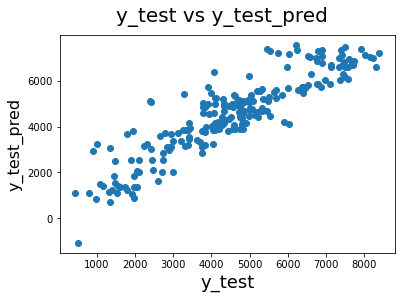

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

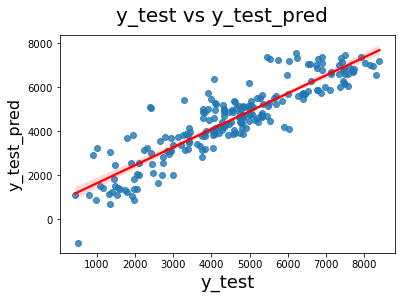

In [82]:
fig = plt.figure()
sns.regplot(y_test, y_test_pred, line_kws={"color":"red"})
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

In [83]:
boombikes.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  days  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882     0   
1   0        0           1  14.902598  17.68695  69.6087  16.652113     1   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     2   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     3   
4   0        0           1   9.305237  11.46350  43.6957  12.522300     4   

   season_spring  season_summer  ...  mnth_oct  mnth_sep  weekday_fri  \
0              1              0  ...         0         0            0   
1              1              0  ...         0         0            0   
2              1              0  ...         0         0            0   
3              1              0  ...         0         0            0   
4              1              0  ...         0         0            1   

   weekday_mon  weekday_sat  weekday_thru  weekday_tue  weekday_wed  \
0            1            0             0            0            0   
1            0            0             0            1            0   
2            0            0             0            0            1   
3            0            0             1            0            0   
4            0            0             0            0            0   

   weathersit_light snow  weathersit_mist  
0                      0                1  
1                      0                1  
2                      0                0  
3                      0                0  
4                      0                0  

[5 rows x 30 columns]

In [84]:
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          3.09e-179
Time:                        00:37:27   Log-Likelihood:                -4154.4
No. Observations:                 510   AIC:                             8327.
Df Residuals:                     501   BIC:                             8365.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1230.29

We can see that the equation of our best fitted line is:

cnt = 0.20293×yr + 0.42719×temp - 0.05846×season_spring + 0.044495×season_summer + 0.081943×season_winter + 0.07955mnth_sep - 0.0665×weathersit_mist - 0.25788weather_light snow

## Results

### Analysing the above model, the company should focus on the following features:

- Company should focus on expanding business during spring.
- Company should focus on expanding business during mist.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to   2019.
- There would be less bookings during light snow and heavy rain, they could use this time for bikes maintaince wihtout any   impact on business.

### Conclusion
Significant variables to predict the demand for shared bikes

- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- weathersit( Light Snow, Mist + Cloudy)